In [48]:
from functions import *
import anndata as ad
import os

In [49]:
pth0 = '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count'
pths = [os.path.join(pth0, "".join([f,'/outs/binned_outputs/square_016um'])) for f in os.listdir(pth0)]
pths

['/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/AJER376R/outs/binned_outputs/square_016um',
 '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/AJGB283/outs/binned_outputs/square_016um',
 '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/AJLC170/outs/binned_outputs/square_016um',
 '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/visium hd/LK01JHU510_000_analysis/count/ALAH020_FT/outs/binned_outputs/square_016um']

In [50]:
i = 0

pth = pths[i]

In [51]:
adata = sc.read_visium(pth)
adata = fix_xy(adata)
df = make_raw_matrix(pth, adata)

/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/donald/miniforge3/envs/visium/lib/python3.12/site-packages/scanpy/readwrite.py:482: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(


In [52]:
df.head()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
s_016um_00052_00082-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
s_016um_00010_00367-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_016um_00238_00388-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_016um_00396_00063-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0
s_016um_00144_00175-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # if mitochondrial genes are labeled with 'MT-'
sc.pp.log1p(adata)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [54]:
highly_var_genes = adata.var['highly_variable'][adata.var['highly_variable']].index.to_list()
highly_var_genes[:5]

['HES4', 'AGRN', 'INTS11', 'AURKAIP1', 'ANKRD65']

In [45]:
adata.var['mean_counts'].idxmax()

'TAGLN'

In [46]:
gene = 'TAGLN'
gene_exp = df.loc[:,gene]
spot_coords = adata.obsm['spatial']

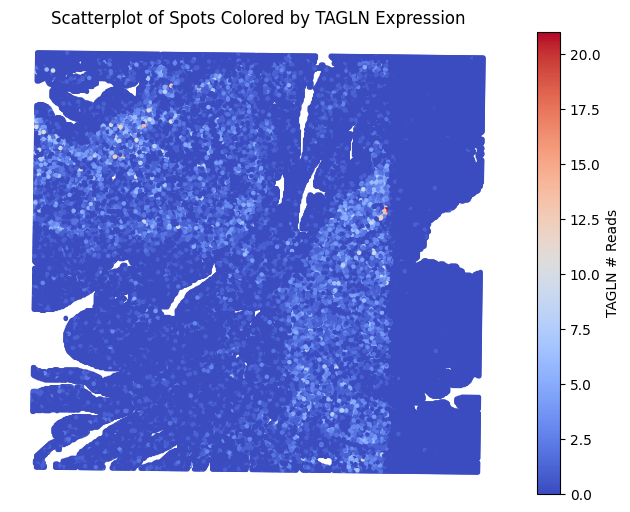

In [47]:
# Create scatterplot
plt.figure(figsize=(8,6))
scatter = plt.scatter(spot_coords[:, 0], spot_coords[:, 1], c=gene_exp, cmap='coolwarm', s=5)

# Add colorbar
plt.colorbar(scatter, label=f"{gene} # Reads")

# Add labels and titleW
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Scatterplot of Spots Colored by {gene} Expression')
plt.axis('off')

plt.show()